## 1. Анализ данных в Python (pandas и numpy)

##Датасет: Toyota Used Cars Market Insights

##Работа студентки группы ПМИ-1.2, Лысовой Анастасии Олеговны

## А. Загрузка и первичный обзор




Я загружу файл 'toyota.csv' в DataFrame pandas с именем df, выведу его первые и последние 5 строк, покажу общую информацию, используя .info(), и проверю типы данных всех столбцов, используя .dtypes.




In [12]:
import pandas as pd

# 1. Загрузите данные из файла 'toyota.csv' в DataFrame с именем df
df = pd.read_csv('toyota.csv')

# 2. Выведите первые 5 строк DataFrame df
print("Первые 5 строк DataFrame:\n")
print(df.head())

# 3. Выведите последние 5 строк DataFrame df
print("\nПоследние 5 строк DataFrame:\n")
print(df.tail())

# 4. Выведите общую информацию о DataFrame df
print("\nОбщая информация о DataFrame:\n")
df.info()

# 5. Проверьте типы данных всех столбцов в DataFrame df
print("\nТипы данных всех столбцов:\n")
print(df.dtypes)

Первые 5 строк DataFrame:

   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0

Последние 5 строк DataFrame:

               model  year  price transmission  mileage fuelType  tax   mpg  \
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engin

## В. Обработка данных

## 1. Обработка пропущенных значений





Сначала я использую метод .isnull().sum() для определения и подсчета пропущенных значений в каждом столбце DataFrame df. Это позволит определить, требуются ли дальнейшие действия по обработке пропущенных данных.



In [13]:
missing_values = df.isnull().sum()
print("Количество пропущенных значений в каждом столбце:\n")
print(missing_values)

Количество пропущенных значений в каждом столбце:

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


## 2. Обработка дубликатов




Сначала я подсчитаю количество дублирующихся строк в DataFrame df, используя duplicated().sum(). Если дубликаты будут найдены, я затем удалю их с помощью drop_duplicates() и сохраню результат в новом DataFrame с именем df_cleaned.



In [14]:
duplicate_rows_count = df.duplicated().sum()
print(f"Количество дубликатов строк: {duplicate_rows_count}")

# Удаление дубликатов строк
df_cleaned = df.drop_duplicates()
print(f"\nРазмер DataFrame после удаления дубликатов: {df_cleaned.shape}")

Количество дубликатов строк: 39

Размер DataFrame после удаления дубликатов: (6699, 9)


## 3. Обработка выбросов



Сначала я определю все числовые столбцы в DataFrame df_cleaned, проверив их типы данных. Затем для каждого числового столбца я вычислю Z-score  для каждого значения, идентифицирую выбросы на основе порога |Z-score | > 3 и подсчитаю количество выбросов. Наконец, я визуализирую распределение и выбросы для каждого числового столбца с помощью Boxplot.



Numerical columns identified: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

Column 'year': 130 outliers (Z-score > 3)
Column 'price': 76 outliers (Z-score > 3)
Column 'mileage': 112 outliers (Z-score > 3)
Column 'tax': 20 outliers (Z-score > 3)
Column 'mpg': 41 outliers (Z-score > 3)
Column 'engineSize': 78 outliers (Z-score > 3)


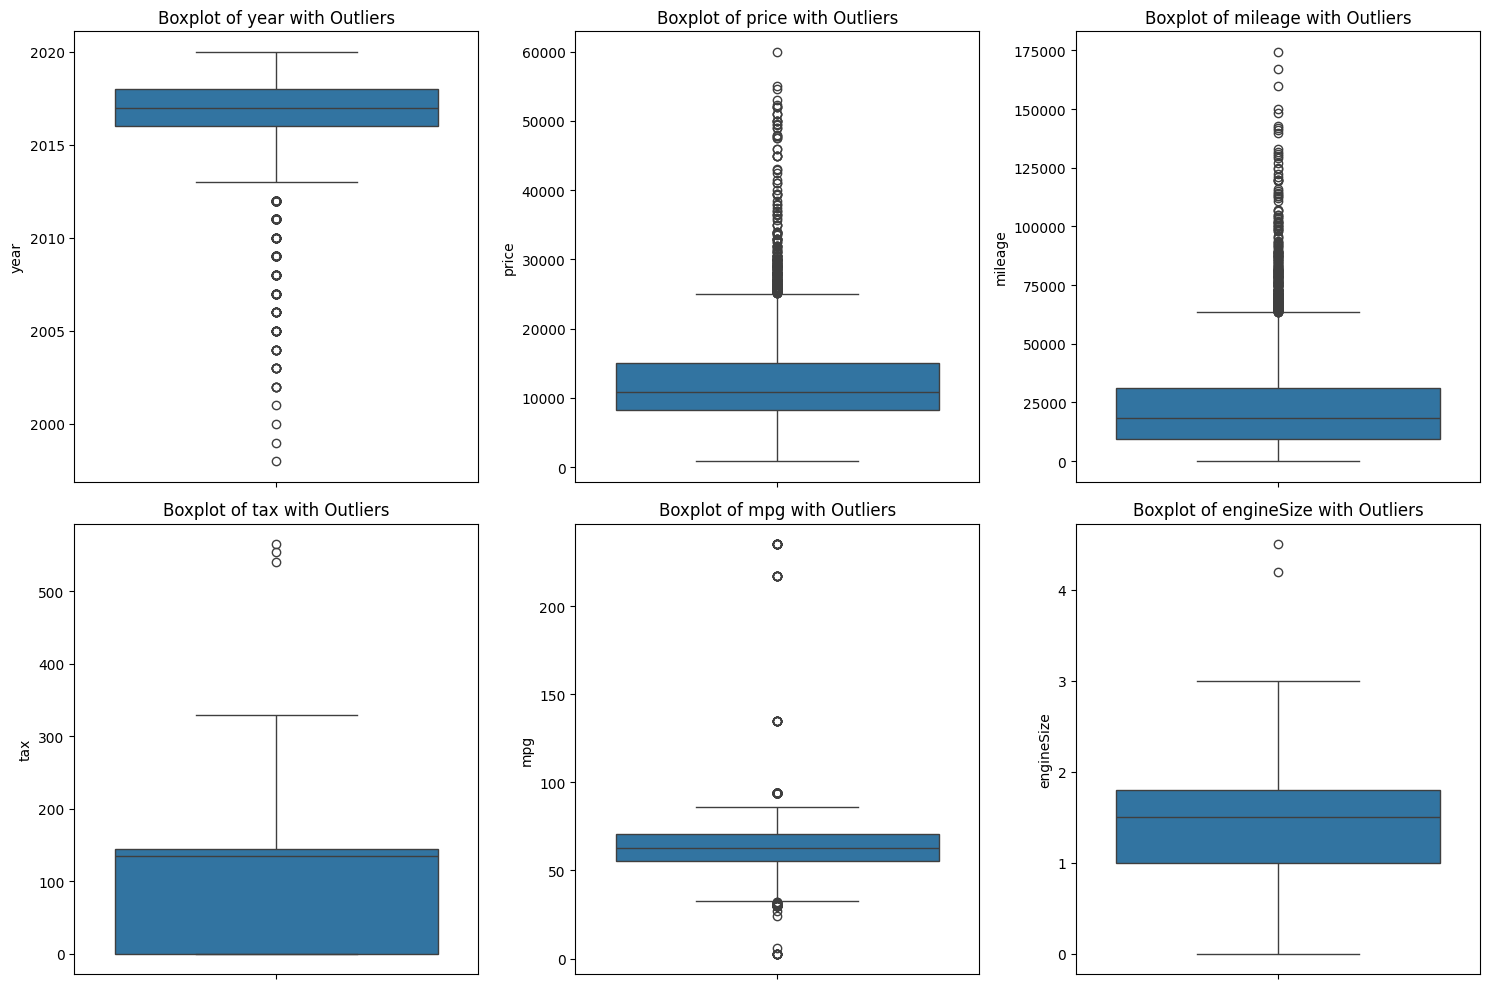


Total number of outliers per numerical column (Z-score > 3):
  year: 130
  price: 76
  mileage: 112
  tax: 20
  mpg: 41
  engineSize: 78


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 1. Identify numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

print(f"Numerical columns identified: {numerical_cols}\n")

outliers_dict = {}

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    # 2. Calculate Z-scores
    z_scores = np.abs(zscore(df_cleaned[col]))

    outliers = df_cleaned[z_scores > 3]
    num_outliers = len(outliers)
    outliers_dict[col] = num_outliers

    print(f"Column '{col}': {num_outliers} outliers (Z-score > 3)")

    plt.subplot(np.ceil(len(numerical_cols)/3).astype(int), 3, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} with Outliers')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("\nTotal number of outliers per numerical column (Z-score > 3):")
for col, count in outliers_dict.items():
    print(f"  {col}: {count}")

## Статистики данных




Я выполню описательную статистику для числовых столбцов, подсчитаю уникальные значения для категориальных признаков и вычислю матрицу корреляций для числовых переменных, чтобы завершить подзадачу статистического анализа.



In [16]:
import pandas as pd
import numpy as np

# 1. Выведите описательную статистику для всех числовых столбцов
print("\nОписательная статистика для числовых столбцов:\n")
print(df_cleaned.describe())

# 2. Идентифицируйте категориальные столбцы
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
print(f"\nКатегориальные столбцы: {categorical_cols}\n")

# 3. Для каждого категориального столбца подсчитайте количество уникальных значений и их частоты
print("\nУникальные значения и их частоты для категориальных столбцов:\n")
for col in categorical_cols:
    print(f"--- Столбец: {col} ---")
    print(df_cleaned[col].value_counts())
    print("\n")

# 4. Вычислите матрицу корреляций для всех числовых столбцов
print("\nМатрица корреляций для числовых столбцов:\n")
correlation_matrix = df_cleaned.select_dtypes(include=np.number).corr()
print(correlation_matrix)



Описательная статистика для числовых столбцов:

              year         price        mileage          tax          mpg  \
count  6699.000000   6699.000000    6699.000000  6699.000000  6699.000000   
mean   2016.742797  12529.799074   22889.588745    94.549933    63.078728   
std       2.205271   6358.562625   19109.288501    73.942649    15.861037   
min    1998.000000    850.000000       2.000000     0.000000     2.800000   
25%    2016.000000   8266.500000    9488.500000     0.000000    55.400000   
50%    2017.000000  10798.000000   18571.000000   135.000000    62.800000   
75%    2018.000000  14995.000000   31059.500000   145.000000    70.600000   
max    2020.000000  59995.000000  174419.000000   565.000000   235.000000   

        engineSize  
count  6699.000000  
mean      1.471996  
std       0.435624  
min       0.000000  
25%       1.000000  
50%       1.500000  
75%       1.800000  
max       4.500000  

Категориальные столбцы: ['model', 'transmission', 'fuelType']


Уни

## С. Визуализация данных




Я импортирую необходимые библиотеки, затем построю гистограммы для числовых столбцов, линейный график средней цены по годам, столбчатые диаграммы для количества моделей и средней цены по типу топлива, boxplot для сравнения цены по типу трансмиссии и, наконец, тепловую карту корреляций, используя существующие данные **df_cleaned**, **average_price_per_year**, **average_price_by_fueltype** и **correlation_matrix**.




Generating Histograms...


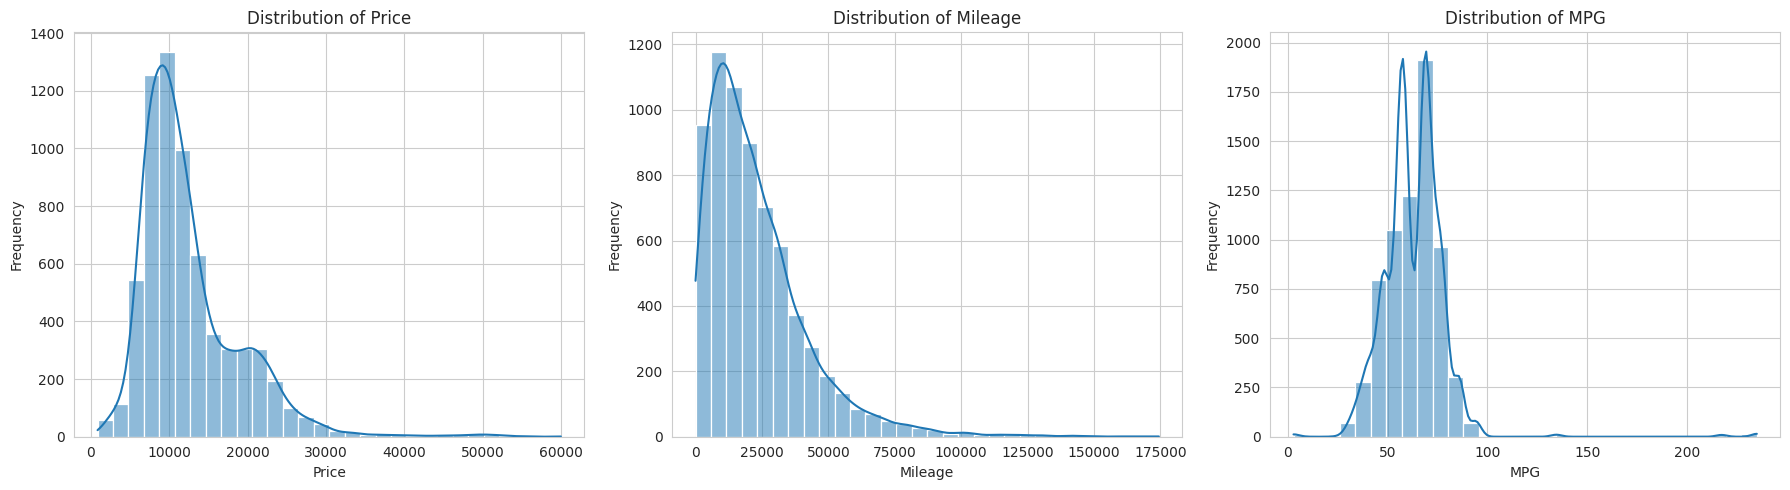

Generating Line Plot for Price over Year...


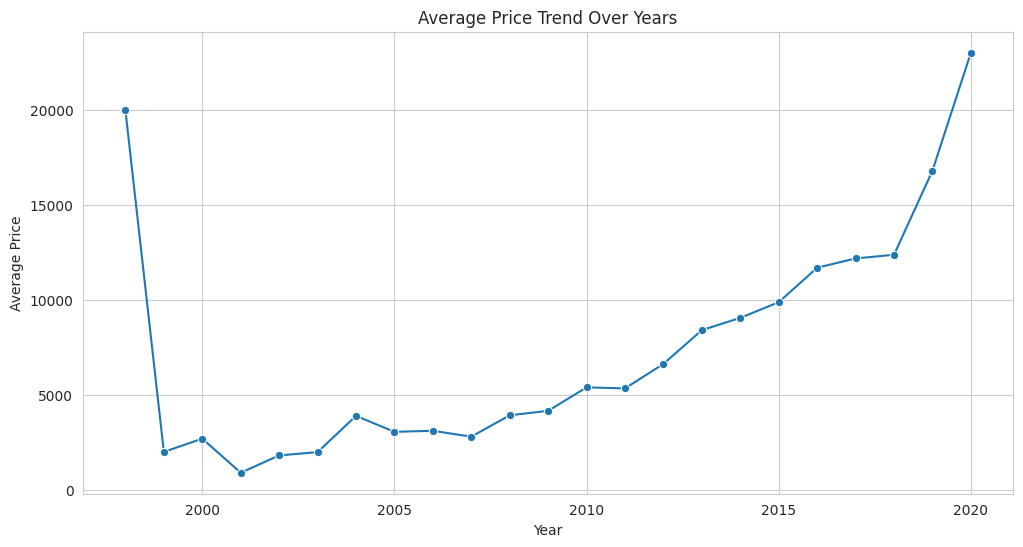

Generating Bar Chart for Top Models...


/tmp/ipython-input-1135773075.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')


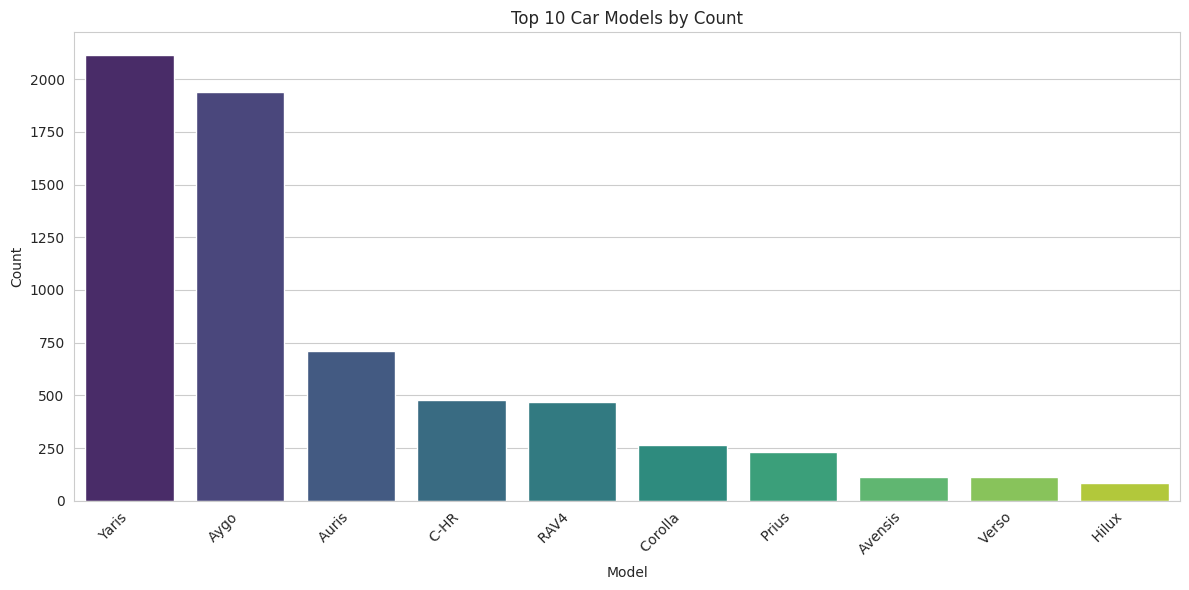

/tmp/ipython-input-1135773075.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_by_fueltype, x='fuelType', y='price', palette='coolwarm')


Generating Bar Chart for Average Price by Fuel Type...


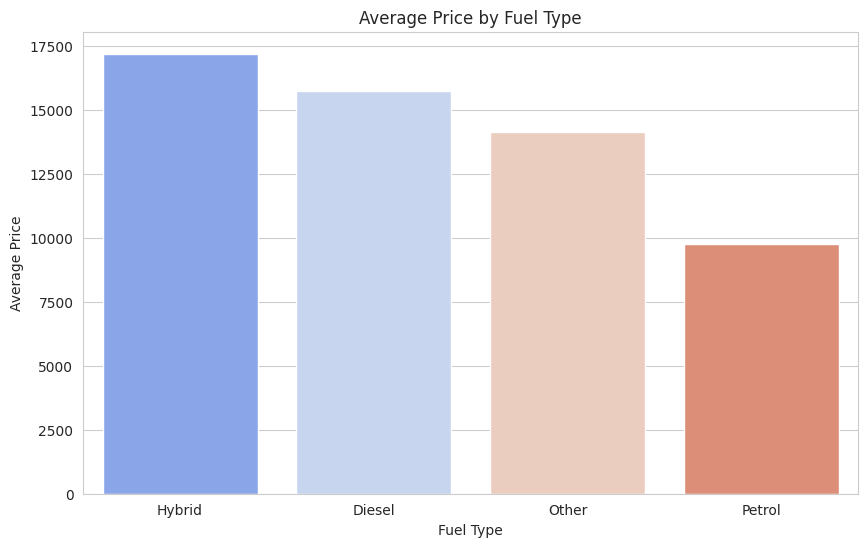

Generating Boxplot for Price vs Transmission...


/tmp/ipython-input-1135773075.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='transmission', y='price', palette='pastel')


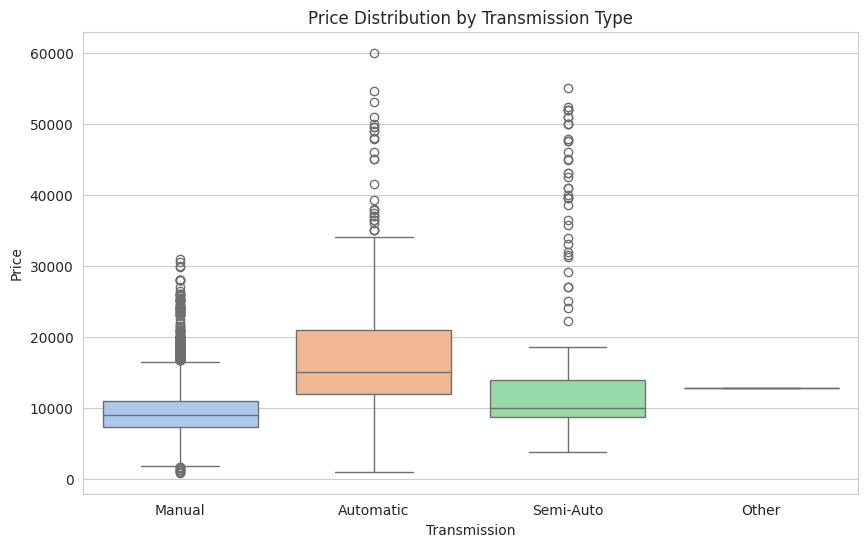

Generating Correlation Heatmap...


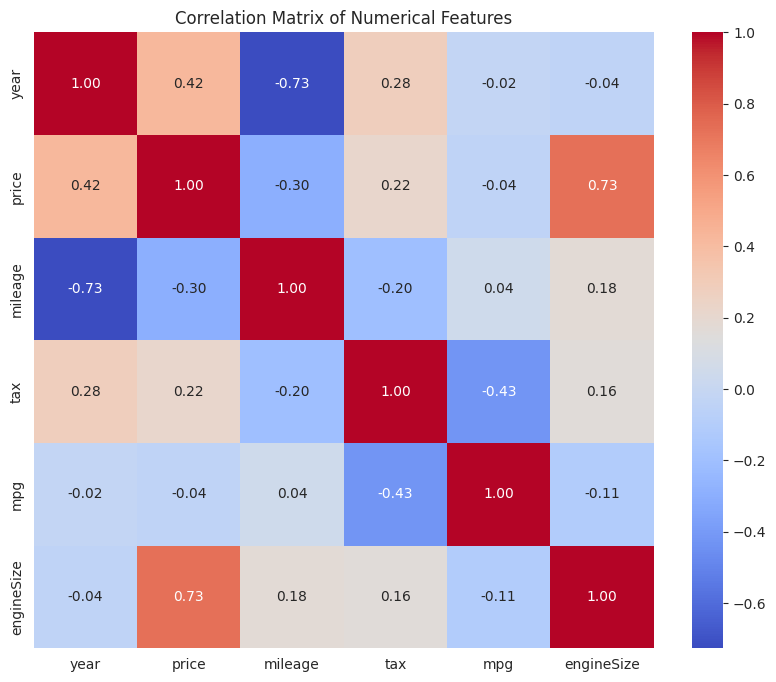

All requested visualizations have been generated.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style for plots
sns.set_style("whitegrid")

# 1. Histograms for numerical columns ('price', 'mileage', 'mpg')
print("Generating Histograms...")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['mileage'], kde=True, bins=30)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['mpg'], kde=True, bins=30)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Generating Line Plot for Price over Year...")
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_year, x='year', y='price', marker='o')
plt.title('Average Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

print("Generating Bar Chart for Top Models...")
plt.figure(figsize=(12, 6))
top_models = df_cleaned['model'].value_counts().head(10)
sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')
plt.title('Top 10 Car Models by Count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Generating Bar Chart for Average Price by Fuel Type...")
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_fueltype, x='fuelType', y='price', palette='coolwarm')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

print("Generating Boxplot for Price vs Transmission...")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='transmission', y='price', palette='pastel')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

print("Generating Correlation Heatmap...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("All requested visualizations have been generated.")

## D. Группировки и агрегации



 Теперь я выполню три различных типа агрегаций, используя groupby() для DataFrame df_cleaned:

Рассчитаю среднюю цену для каждой модели автомобиля.

Подсчитаю количество автомобилей для каждого типа топлива.

Вычислю общий пробег для каждого типа трансмиссии. Это даст представление о наборе данных на основе различных категориальных признаков.

In [34]:
# 1. Средняя цена по моделям автомобилей
print("\nСредняя цена по моделям автомобилей:\n")
average_price_by_model = df_cleaned.groupby('model')['price'].mean().sort_values(ascending=False)
print(average_price_by_model.head())

# 2. Количество автомобилей по типу топлива
print("\nКоличество автомобилей по типу топлива:\n")
car_count_by_fueltype = df_cleaned.groupby('fuelType').size().sort_values(ascending=False)
print(car_count_by_fueltype)

# 3. Суммарный пробег по типу трансмиссии
print("\nСуммарный пробег по типу трансмиссии:\n")
total_mileage_by_transmission = df_cleaned.groupby('transmission')['mileage'].sum().sort_values(ascending=False)
print(total_mileage_by_transmission)


Средняя цена по моделям автомобилей:

model
Supra           50741.000000
Land Cruiser    36487.156863
PROACE VERSO    28680.200000
Camry           26910.090909
Hilux           21581.176471
Name: price, dtype: float64

Количество автомобилей по типу топлива:

fuelType
Petrol    4058
Hybrid    2040
Diesel     496
Other      105
dtype: int64

Суммарный пробег по типу трансмиссии:

transmission
Manual       85556409
Automatic    63454384
Semi-Auto     4309829
Other           16733
Name: mileage, dtype: int64
